In [ ]:
'''
You have to run the notebook twice in order to get it to work
The first time you run it you should get some error when trying to import the Action LLM
Just click:
  Runtime
    Restart session and run all
'''

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
colab = True#False#
usingGitHub = False#

In [3]:


if(colab == True):
  '''!pip install --upgrade diffusers
  #!pip install --upgrade diffusers accelerate transformers
  #!pip install -q -U transformers==4.37.2
  #!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
  !pip install transformers
  !pip install accelerate
  !pip install bitsandbytes
  !pip install joblib==1.4.2
  !pip install langchain==0.0.162
  !pip install langchain-core==0.2.43
  !pip install numpy==1.26.4
  !pip install openai==0.27.4
  !pip install pandas==1.5.3
  !pip install python-dotenv==1.0.0
  !pip install scikit-learn==1.5.1
  !pip install tenacity==8.2.2
  !pip install tiktoken==0.8.0
  !pip install transformers==4.46.2
  !pip install wikipedia==1.4.0
  #!pip install --upgrade diffusers accelerate transformers
  !pip install git+https://github.com/openai/CLIP.git
  !pip install torch torchvision'''



  # Step 1: Force reinstall NumPy to ensure a consistent binary interface
  !pip install --upgrade --force-reinstall numpy==1.26.4

  # Step 2: Install (or upgrade) the remaining packages together.
  # Note: We specify transformers==4.46.2 (as in your list) and include diffusers, accelerate, and bitsandbytes.
  !pip install --upgrade diffusers transformers==4.46.2 accelerate bitsandbytes joblib==1.4.2 \
                  langchain==0.0.162 langchain-core==0.2.43 openai==0.27.4 pandas==1.5.3 \
                  python-dotenv==1.0.0 scikit-learn==1.5.1 tenacity==8.2.2 tiktoken==0.8.0 \
                  wikipedia==1.4.0

  # Step 3: Install CLIP from its GitHub repository
  !pip install git+https://github.com/openai/CLIP.git
  !pip install lpips
  !pip install PIL

  # Step 4: Install torch and torchvision
  !pip install torch torchvision

  if(usingGitHub == True):
    %cd /content
    !git clone -b DevBranch --single-branch https://github.com/DEVdaVinci/Reflexion-LLaVA.git
    #!git clone https://github.com/DEVdaVinci/Reflexion-LLaVA.git
    #!cd /content/Reflexion-LLaVA && git checkout DevBranch

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
albumentations 2.0.5 requires pydantic>=2.9.2, but you have pydantic 1.10.21 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompat

In [4]:
import sys, os

In [5]:
os.getcwd()

'/content'

In [11]:
import re

In [12]:

import string, os
from typing import List, Union, Literal
from enum import Enum
import tiktoken
from langchain import OpenAI, Wikipedia
from langchain.llms.base import BaseLLM
from langchain.chat_models import ChatOpenAI
from langchain.chat_models.base import BaseChatModel
from langchain.schema import (
    SystemMessage,
    HumanMessage,
    AIMessage,
)
from langchain.agents.react.base import DocstoreExplorer
from langchain.docstore.base import Docstore
from langchain.prompts import PromptTemplate

import torch
from transformers import BitsAndBytesConfig
from transformers import pipeline

In [13]:

class ActionLLM:
    def __init__(self, modelType, inModel: None):
        self.modelType = modelType

        if inModel != None:
            self.model = inModel
        else:
            if modelType == "LLaVA":
                #!!!!!
                self.quantization_config = BitsAndBytesConfig(
                    load_in_4bit=True,
                    bnb_4bit_compute_dtype=torch.float16
                )
                self.model_id = "llava-hf/llava-1.5-7b-hf"
                self.model = pipeline("image-to-text", model=self.model_id, model_kwargs={"quantization_config": self.quantization_config})
                #!!!!!
    def run(self, prompt, image = None, inMaxNewTokens = 200):
        if(self.modelType == "LLaVA"):
            return self.run_LLaVA(prompt, image, inMaxNewTokens)
    def run_LLaVA(self, prompt, image = None, inMaxNewTokens = 200):
        max_new_tokens = inMaxNewTokens
        prompt = prompt
        if image != None:
            outputs = self.model(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
        else:
            outputs = self.model(prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})
        #return outputs
        return outputs[0]["generated_text"]#!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [14]:
model_imageLLaVA = ActionLLM("LLaVA", None)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [15]:
from diffusers import DiffusionPipeline

#similarity metric
import torch
import clip
from PIL import Image #not used
import torch.nn as nn
import torchvision.transforms as transforms
import lpips
import requests

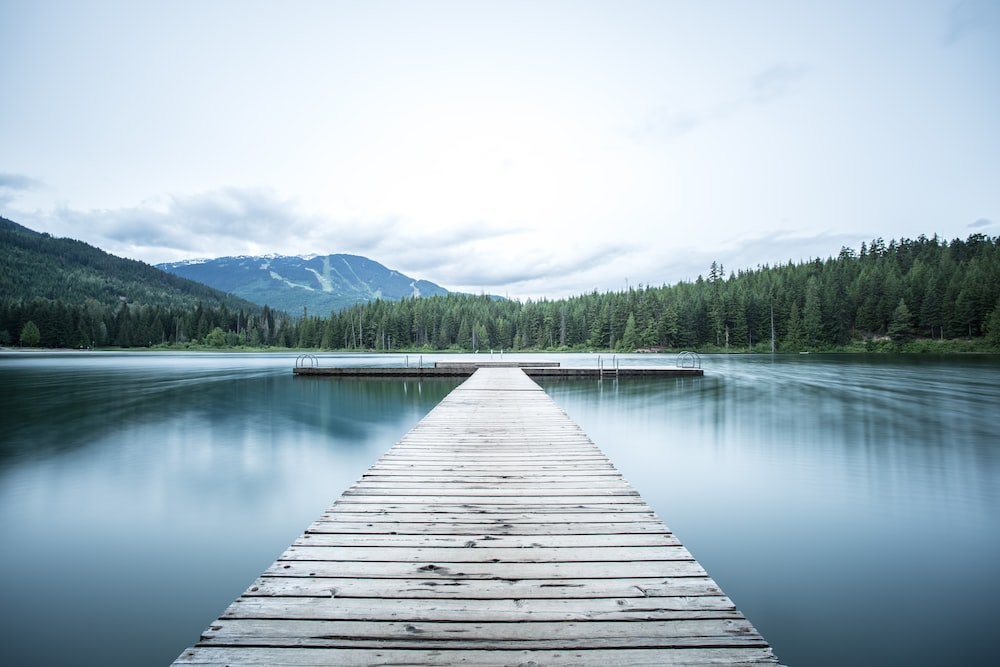

In [16]:

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [17]:
prompt = "USER: <image>\nCreate a prompt that can be used to generate a similar image?\nASSISTANT:"
#prompt = "USER: <image>\nHow many people appear in the image, give a count for adults and children?\nASSISTANT:"

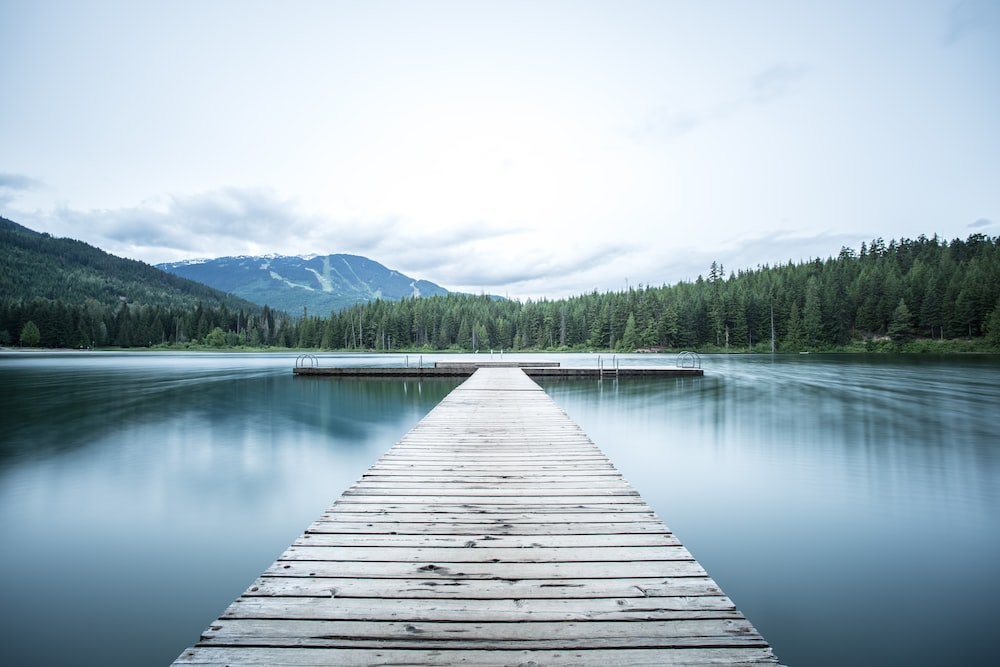

In [18]:
image


In [19]:
prompt

'USER: <image>\nCreate a prompt that can be used to generate a similar image?\nASSISTANT:'

In [20]:
#run_LLaVA(prompt, image = None, inMaxNewTokens = 200)
generatedPrompt = model_imageLLaVA.run_LLaVA(prompt, image = image, inMaxNewTokens = 200)

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


In [21]:
generatedPrompt

'USER:  \nCreate a prompt that can be used to generate a similar image?\nASSISTANT: A wooden pier extending over a body of water, with a mountainous landscape in the background. The pier is surrounded by a lush forest, and there are a few boats docked nearby. The scene is serene and picturesque, with the pier serving as a connection between the land and the water.'

In [22]:


class StableDiffusionEval_test:
    def __init__(self):
        #self.modelType = modelType
        #self.pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
        #self.pipeline.to("cuda")
        #This is necessary for the similarity metric
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model, self.preprocess = clip.load("ViT-B/32", device=self.device)
    def evaluatePrompt(self, prompt, originalImage):
        generatedImage = self.generateImage(prompt)
        similarityScore = self.evaluateGeneratedImage(image_og = originalImage, image_generated = generatedImage)
        return similarityScore
    def generateImage(self, prompt: str):
        self.pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
        self.pipeline.to("cuda")

        generatedImage = self.pipeline(prompt).images[0]
        return generatedImage
    def evaluateGeneratedImage(self, image_og, image_generated, doPrint = False):
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        '''cos = torch.nn.CosineSimilarity(dim=0)

        image_og_preprocess = self.preprocess(image_og).unsqueeze(0).to(self.device)
        image_og_features = self.model.encode_image( image_og_preprocess)

        image_generated_preprocess = self.preprocess(image_generated).unsqueeze(0).to(self.device)
        image_generated_features = self.model.encode_image( image_generated_preprocess)

        similarity = cos(image_og_features[0],image_generated_features[0]).item()
        similarity = (similarity+1)/2
        '''

        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

        image_og_features = self.get_clip_embedding(image_og)
        image_generated_features = self.get_clip_embedding(image_generated)



        cosine_similarity_CLIP = torch.nn.functional.cosine_similarity(image_og_features, image_generated_features).item()
        if doPrint:
            print(f"Similarity Score (CLIP): {cosine_similarity_CLIP:.4f}")




        # Load images
        transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
        img1 = transform(image_og).unsqueeze(0)
        img2 = transform(image_generated).unsqueeze(0)



        # Load LPIPS model
        lpips_model_alex = lpips.LPIPS(net='alex')  # Use 'vgg' for VGG features
        # Compute LPIPS distance (lower = more similar)
        lpips_score_alex = lpips_model_alex(img1, img2).item()
        lpips_simScore_alex = 1 - lpips_score_alex  # Convert to similarity score (higher = more similar)
        if doPrint:
            print(f"LPIPS Perceptual Similarity Score (Alex): {lpips_simScore_alex}")

        # Load LPIPS model
        loss_fn_vgg = lpips.LPIPS(net='vgg')  # 'alex', 'vgg', or 'squeeze' network
        # Compute perceptual similarity
        lpips_score_vgg = loss_fn_vgg(img1, img2).item()
        lpips_simScore_vgg = 1 - lpips_score_vgg  # Convert to similarity score (higher = more similar)
        if doPrint:
            print(f"LPIPS Perceptual Similarity (VGG): {lpips_simScore_vgg}")

        # Load LPIPS model
        loss_fn_squeeze = lpips.LPIPS(net='squeeze')  # 'alex', 'vgg', or 'squeeze' network
        # Compute perceptual similarity
        lpips_score_squeeze = loss_fn_squeeze(img1, img2).item()
        lpips_simScore_squeeze = 1 - lpips_score_squeeze  # Convert to similarity score (higher = more similar)
        if doPrint:
            print(f"LPIPS Perceptual Similarity (Squeeze): {lpips_simScore_squeeze}")


        #What are sim scores?
            #These are essentially normalized scores
            #you have to subtract the scores from 1
            #Initially high numbers = different images & low numbers = similar
            #After you "normalize" high numbers = simialr & llow numbers = different



        #This is the one you should go with for now

        #Go with Alex. Its hard to tell a difinative winner but lets go with this

        simScore_alex = lpips_simScore_alex * cosine_similarity_CLIP
        simScore_vgg = lpips_simScore_vgg * cosine_similarity_CLIP
        simScore_squeeze = lpips_simScore_squeeze * cosine_similarity_CLIP


        avgSimScore_alex = (lpips_simScore_alex + cosine_similarity_CLIP)/2
        avgSimScore_vgg = (lpips_simScore_vgg + cosine_similarity_CLIP)/2
        avgSimScore_squeeze = (lpips_simScore_squeeze + cosine_similarity_CLIP)/2
        if doPrint:
            print(f"Average Similarity Score (Alex): {avgSimScore_alex}")
            print(f"Average Similarity Score (VGG): {avgSimScore_vgg}")
            print(f"Average Similarity Score (Squeeze): {avgSimScore_squeeze}")



        avgScore = avgSimScore_alex + avgSimScore_vgg + avgSimScore_squeeze
        avgScore = avgScore/3
        if doPrint:
            print(f"avgScore = {avgSimScore_alex}")








        #MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
        simpleWeightedAvgSimScore2_alex = self.simpleWeightedAvg_modified(lpips_simScore_alex, cosine_similarity_CLIP, avgScore)
        simpleWeightedAvgSimScore2_vgg = self.simpleWeightedAvg_modified(lpips_simScore_vgg, cosine_similarity_CLIP, avgScore)
        simpleWeightedAvgSimScore2_squeeze = self.simpleWeightedAvg_modified(lpips_simScore_squeeze, cosine_similarity_CLIP, avgScore)
        if doPrint:
            print(f"Simple Weighted Average Similarity Score (Alex): {simpleWeightedAvgSimScore2_alex}")
            print(f"Simple Weighted Average Similarity Score (VGG): {simpleWeightedAvgSimScore2_vgg}")
            print(f"Simple Weighted Average Similarity Score (Squeeze): {simpleWeightedAvgSimScore2_squeeze}")
        #WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW

        similarity = simpleWeightedAvgSimScore2_vgg

        if doPrint:
            print("Image similarity", similarity)

        return similarity

    def get_clip_embedding(self, inImage):
        image = inImage
        image = self.preprocess(image).unsqueeze(0).to(self.device)

        with torch.no_grad():
            image_features = self.model.encode_image(image)

        return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize
    def simpleWeightedAvg_modified_og(self, inScore_LPIPS, inScore_CLIP, inAvgScore, inMultiplier = 4):
        if inAvgScore > .5:
            #inScore_LPIPS = 0
            inScore_CLIP = inScore_CLIP**(1/inMultiplier)
            return inScore_CLIP
        else:
            inScore_LPIPS = inScore_LPIPS**inMultiplier
            #inScore_CLIP = 0
            return inScore_LPIPS
    def simpleWeightedAvg_modified(self, inScore_LPIPS, inScore_CLIP, inAvgScore):
        #The lowest value of the multiplier is 1
        #The Highest vaue is 4
        #If the multiplier has its lowest vaue no boosting occurs
        inMultiplier = 3*(abs(.5 - inAvgScore)/.5)+1
        if inAvgScore > .5:
            #inScore_LPIPS = 0
            inScore_CLIP = inScore_CLIP**(1/inMultiplier)
            return inScore_CLIP
        else:
            inScore_LPIPS = inScore_LPIPS**inMultiplier
            #inScore_CLIP = 0
            return inScore_LPIPS

In [23]:


evaluator = StableDiffusionEval_test()

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 199MiB/s]


In [24]:
generatedImage = evaluator.generateImage(generatedPrompt)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

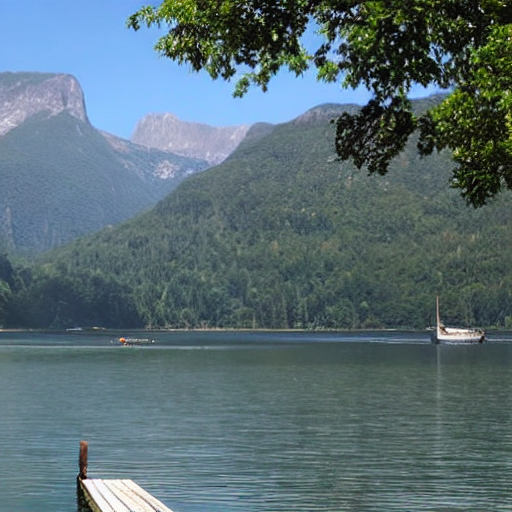

In [25]:
generatedImage

In [26]:
score = evaluator.evaluateGeneratedImage(image, generatedImage, True)

Similarity Score (CLIP): 0.7725
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 154MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS Perceptual Similarity Score (Alex): 0.3593853712081909
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 55.7MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


LPIPS Perceptual Similarity (VGG): 0.38182783126831055
Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [off]


100%|██████████| 4.73M/4.73M [00:00<00:00, 66.8MB/s]

Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/squeeze.pth


LPIPS Perceptual Similarity (Squeeze): 0.5324078798294067
Average Similarity Score (Alex): 0.5659231543540955
Average Similarity Score (VGG): 0.5771443843841553
Average Similarity Score (Squeeze): 0.6524344086647034
avgScore = 0.5659231543540955
Simple Weighted Average Similarity Score (Alex): 0.8502107422496147
Simple Weighted Average Similarity Score (VGG): 0.8502107422496147
Simple Weighted Average Similarity Score (Squeeze): 0.8502107422496147
Image similarity 0.8502107422496147


In [27]:
score

0.8502107422496147

In [28]:
#score2 = evaluator.evaluateGeneratedImage(image, generatedImage, True)